## **Projeto Final da cadeira de Machine Learning I**
* Nome: Volenei Fuzer
* Base: CancerMama.csv
* Propósito: Criar dois modelos, um com regressão logística e outro com árvore aleatória.

## **01) importantando as bibliotecas**

In [138]:
#Algebra Linear
import numpy as np 

# Processamento/manipulação dos dados
import pandas as pd 

# Visualização dos dados
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from IPython.display import display

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, precision_score, recall_score,f1_score, precision_recall_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

## **02) Importando e avaliando o dataset**

In [139]:
# importando o dataset

dts_cancer_mama = pd.read_csv("CancerMama.csv")

In [140]:
# avaliando as variáveis do dataset

dts_cancer_mama.head()
    
    # todas as variáveis são numericas exceto a classe. Assim vamos precisar substituir esses valores categóricos por numéricos.

,espessura_massa,uni_tamanho_celula,uni_forma_celula,adesao_marginal,tamanho_celula_epitelial_unica,nucleos_nus,cromatina_branda,nucleolos_normais,mitose,classe
0,5,1,1,1,2,1,3,1,1,benigno
1,5,4,4,5,7,10,3,2,1,benigno
2,3,1,1,1,2,2,3,1,1,benigno
3,6,8,8,1,3,4,3,7,1,benigno
4,4,1,1,3,2,1,3,1,1,benigno


In [141]:
# avaliando os tipos das variáveis:

dts_cancer_mama.info()
# dts_cancer_mama.dtypes
    
    # Aqui podemos observar que vamos trabalhar com 10 variáveis, sendo 9 do tipo inteiro e uma do tipo objeto
    # Aparentemente não existem dados não preenchidos (vazio ou nulos) porém vamos analisar com mais detalher para termos certeza

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
espessura_massa                   569 non-null int64
uni_tamanho_celula                569 non-null int64
uni_forma_celula                  569 non-null int64
adesao_marginal                   569 non-null int64
tamanho_celula_epitelial_unica    569 non-null int64
nucleos_nus                       569 non-null int64
cromatina_branda                  569 non-null int64
nucleolos_normais                 569 non-null int64
mitose                            569 non-null int64
classe                            569 non-null object
dtypes: int64(9), object(1)
memory usage: 44.5+ KB


In [142]:
# Avaliando a existência de dados nulos

print(dts_cancer_mama.isnull().sum())

    # realmente não existem dados nulos porém podem existir algum vazio então vamos avalir

espessura_massa                   0
uni_tamanho_celula                0
uni_forma_celula                  0
adesao_marginal                   0
tamanho_celula_epitelial_unica    0
nucleos_nus                       0
cromatina_branda                  0
nucleolos_normais                 0
mitose                            0
classe                            0
dtype: int64


In [143]:
# Substituindo os valores vazios por NaN

dts_cancer_mama = dts_cancer_mama.apply(lambda x: x.replace('',np.NaN))
dts_cancer_mama.head(50)

,espessura_massa,uni_tamanho_celula,uni_forma_celula,adesao_marginal,tamanho_celula_epitelial_unica,nucleos_nus,cromatina_branda,nucleolos_normais,mitose,classe
0,5,1,1,1,2,1,3,1,1,benigno
1,5,4,4,5,7,10,3,2,1,benigno
2,3,1,1,1,2,2,3,1,1,benigno
3,6,8,8,1,3,4,3,7,1,benigno
4,4,1,1,3,2,1,3,1,1,benigno
5,8,10,10,8,7,10,9,7,1,maligno
6,1,1,1,1,2,10,3,1,1,benigno
7,2,1,2,1,2,1,3,1,1,benigno
8,2,1,1,1,2,1,1,1,5,benigno
9,4,2,1,1,2,1,2,1,1,benigno


In [144]:
# Reavaliando os valores nulos

gp_tratado = dts_cancer_mama.isna().sum().sort_values(ascending=False)
perc_1 = dts_cancer_mama.isna().sum()/dts_cancer_mama.isna().count()*100
perc_2 = perc_1.sort_values(ascending=False)
dados_fatantes = pd.concat([gp_tratado, perc_2], axis=1, keys=['Total', '%'])
dados_fatantes.head(12)

    # Realmente não temos valores nulos

,Total,%
classe,0,0.0
mitose,0,0.0
nucleolos_normais,0,0.0
cromatina_branda,0,0.0
nucleos_nus,0,0.0
tamanho_celula_epitelial_unica,0,0.0
adesao_marginal,0,0.0
uni_forma_celula,0,0.0
uni_tamanho_celula,0,0.0
espessura_massa,0,0.0


In [145]:
# Obtendo informações estatísticas 

dts_cancer_mama.describe()

,espessura_massa,uni_tamanho_celula,uni_forma_celula,adesao_marginal,tamanho_celula_epitelial_unica,nucleos_nus,cromatina_branda,nucleolos_normais,mitose
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,4.539543,3.184534,3.265378,2.845343,3.298770,-2632.518453,3.490334,2.989455,1.637961
std,2.896501,3.002236,2.955935,2.873626,2.304775,16035.653408,2.324925,3.091315,1.773941
min,1.000000,1.000000,1.000000,1.000000,1.000000,-100000.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,8.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## **03) Questão para ser respondida**

Avaliando a base de dados podemos observar que existe informações de casos em que o cancer de mama foi comprovado. Um ponto interessante de ser abordado é realizar a avaliação dos casos com base nas variáveis e antecipar o diagnóstico se é maligno ou benigno.Então nossa váriável alvo é a chamada "classe".

Text(0, 0.5, '')

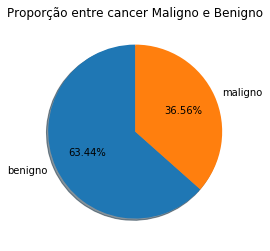

In [146]:
# Plotando um gráfico de pizza para avaliar a proporsão da váriável alvo no dataset

dts_cancer_mama_pizza = dts_cancer_mama.groupby('classe')
labels = list(dts_cancer_mama.classe.drop_duplicates())
fig = dts_cancer_mama_pizza.classe.value_counts().plot.pie(labels=labels, autopct='%.2f%%', shadow=True, startangle=90)
fig.set_title("Proporção entre cancer Maligno e Benigno")
fig.set_ylabel('')
    
    # Podemos observar que a maior parte dos diagnósticos são de cancer benigno. Assim, para não tendenciarmos os modelos
    # Vou criar uma outro dataset com a mesma proporção. Também precisamos alterar a variável alvo de objeto para numérico.

[]

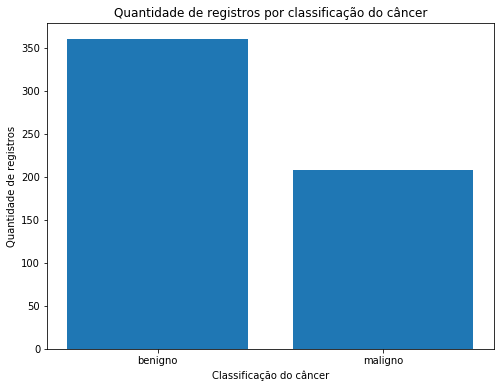

In [134]:
# Vamos avlaiar a quantidade de registros para cada classificação

classe_label = dts_cancer_mama['classe']
classe_sum = classe_label.value_counts()
classe_sum = classe_sum.sort_index()
x = classe_sum.index
y = classe_sum

plt.figure(figsize=(8,6))

plt.bar(x, y)

plt.title('Quantidade de registros por classificação do câncer')
plt.xlabel('Classificação do câncer')
plt.ylabel('Quantidade de registros')
plt.xticks(x) # obriga a mostrar todos os números no eixo x
plt.plot()

In [147]:
print(dts_cancer_mama.classe.value_counts())

    # Agora sabemos exatamento que existem nesta dataset 361 registro de casos de câncer benigno e 208 de maligno

benigno    361
maligno    208
Name: classe, dtype: int64


In [162]:
# para melhorar o resultado vamos criar um dataset novo com a mesma proporção de registros

dts_maligno = dts_cancer_mama.loc[dts_cancer_mama['classe'] == "maligno"]
dts_benigno = dts_cancer_mama.loc[dts_cancer_mama['classe'] == "benigno"]

print(dts_maligno.classe.value_counts())
print(dts_benigno.classe.value_counts())


maligno    208
Name: classe, dtype: int64
benigno    361
Name: classe, dtype: int64


In [163]:
dts_benigno = dts_benigno.head(208)

print(dts_maligno.classe.value_counts())
print(dts_benigno.classe.value_counts())
    
    # agora possuímos a quantidade exata de registros e podemos colocar tudo num dataset só

maligno    208
Name: classe, dtype: int64
benigno    208
Name: classe, dtype: int64


In [175]:
# criando um dataset tratado: Unindo os dataset com mesmo volume

dts_cancer_mama_tratado = pd.merge(dts_maligno, dts_benigno, how='outer')

dts_cancer_mama_tratado = dts_cancer_mama_tratado.sort_values('adesao_marginal')

dts_cancer_mama_tratado.head(300)


,espessura_massa,uni_tamanho_celula,uni_forma_celula,adesao_marginal,tamanho_celula_epitelial_unica,nucleos_nus,cromatina_branda,nucleolos_normais,mitose,classe
207,8,4,4,1,6,10,2,5,2,maligno
284,3,1,2,1,2,1,2,1,1,benigno
281,2,1,1,1,2,1,3,1,1,benigno
280,2,1,1,1,2,1,3,1,1,benigno
279,2,1,1,1,2,1,3,1,1,benigno
278,2,1,1,1,2,1,3,1,1,benigno
147,10,1,1,1,2,10,5,4,1,maligno
277,2,1,1,1,2,1,3,1,1,benigno
276,2,1,1,1,2,1,3,1,1,benigno
275,2,1,1,1,2,1,3,1,1,benigno


In [178]:
# Ajustando a variável alvo para numérico

dts_cancer_mama_tratado['classe'] = dts_cancer_mama_tratado['classe'].replace('maligno', 1)
dts_cancer_mama_tratado['classe'] = dts_cancer_mama_tratado['classe'].replace('benigno', 0)

dts_cancer_mama_tratado.head(20)

,espessura_massa,uni_tamanho_celula,uni_forma_celula,adesao_marginal,tamanho_celula_epitelial_unica,nucleos_nus,cromatina_branda,nucleolos_normais,mitose,classe
207,8,4,4,1,6,10,2,5,2,1
284,3,1,2,1,2,1,2,1,1,0
281,2,1,1,1,2,1,3,1,1,0
280,2,1,1,1,2,1,3,1,1,0
279,2,1,1,1,2,1,3,1,1,0
278,2,1,1,1,2,1,3,1,1,0
147,10,1,1,1,2,10,5,4,1,1
277,2,1,1,1,2,1,3,1,1,0
276,2,1,1,1,2,1,3,1,1,0
275,2,1,1,1,2,1,3,1,1,0


In [ ]:
# Neste caso não existe mais valores categóricos, somente numéricos ou seja, não será necessário utilizar o dummy encoding

## **04) Crianado as bases de teste e treino**

In [179]:
# Separando as varíavais alvo das variáveis independentes

X = dts_cancer_mama_tratado.drop(["classe"],axis=1)
y = dts_cancer_mama_tratado["classe"]

In [180]:
# Separando os datasets em treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [181]:
# Funçõe para auxiliar na visulização:

def confusion_matrix_model(model_used):
    cm = confusion_matrix(y_test, model_used.predict(X_test))
    col = ["Previsto Maligno","Previsto Benigno"]
    cm = pd.DataFrame(cm)
    cm.columns = ["Previsto Maligno","Previsto Benigno"]
    cm.index=["Realmente Maligno","Realmente Benigno"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

## **04.1) Criando o modelo Logistic Regression**

In [182]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(X_train, y_train)
log_reg

C:\Users\Volnei Fuzer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [183]:
# Coeficientes relativos as variáveis independentes/preditoras

print('Coeficientes: \n', log_reg.coef_)
print('Interfacept: \n', log_reg.intercept_)

Coeficientes: 
 [[ 1.53823901e-01  3.99865161e-01  3.91485809e-01  6.78738974e-02
  -6.34554049e-02  3.49200063e-05  1.26488855e-02  1.32677487e-01
   1.02921483e-01]]
Interfacept: 
 [-3.50010309]


In [184]:
# Avaliando para o conjunto de teste os resultaddos da variável alvo

predicao_reglog = log_reg.predict(X_test)
print(predicao_reglog)

[1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1
 1 1 0 0 1 0 1 0 1 1 0 0 1 1]


In [185]:
# medindo a acurácia

print('Acurácia: ', metrics.accuracy_score(y_test, predicao_reglog))

Acurácia:  0.936


In [186]:
# Matriz de Confusão simples

print(confusion_matrix(y_test, predicao_reglog))

[[59  4]
 [ 4 58]]


In [187]:
# Matriz de Confusão com proporções

confusion_matrix_model(log_reg)

,Previsto Maligno,Previsto Benigno
Realmente Maligno,0.94,0.06
Realmente Benigno,0.06,0.94


In [188]:
# outras avaliações
    
print('Precisão: ', metrics.precision_score(y_test, predicao_reglog))
print('Revocação: ', metrics.recall_score(y_test, predicao_reglog))
print('F1-Measure: ', metrics.f1_score(y_test, predicao_reglog))
print('ROC AUC: ', metrics.roc_auc_score(y_test, predicao_reglog))

Precisão:  0.9354838709677419
Revocação:  0.9354838709677419
F1-Measure:  0.9354838709677419
ROC AUC:  0.9359959037378393


In [189]:
# Calcula o "False Positive Rate" e o "True Positive Rate"

fpr, tpr, thresholds = metrics.roc_curve(y_test, predicao_reglog, pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('Area Under the Curve: ', AUC)

Area Under the Curve:  0.9359959037378393


## **04.2) Criando o modelo Random Forest**

In [190]:
log_flor = RandomForestClassifier(n_estimators=1000)
log_flor.fit(X_train, y_train)
log_flor

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [192]:
# Avaliando para o conjunto de teste os resultaddos da variável alvo

predicao_reglog_flor = log_flor.predict(X_test)
print(predicao_reglog_flor)

[1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1
 1 1 0 0 1 0 1 0 1 1 0 0 1 1]


In [193]:
# medindo a acurácia
    
print('Acurácia: ', metrics.accuracy_score(y_test, predicao_reglog_flor))

Acurácia:  0.96


In [194]:
# Matriz de Confusão simples
    
print(confusion_matrix(y_test, predicao_reglog_flor))

[[59  4]
 [ 1 61]]


In [195]:
# Matriz de Confusão com proporções

confusion_matrix_model(log_flor)

,Previsto Maligno,Previsto Benigno
Realmente Maligno,0.94,0.06
Realmente Benigno,0.02,0.98


In [196]:
# avaliações complementares
    
print('Precisão: ', metrics.precision_score(y_test, predicao_reglog_flor))
print('Revocação: ', metrics.recall_score(y_test, predicao_reglog_flor))
print('F1-Measure: ', metrics.f1_score(y_test, predicao_reglog_flor))
print('ROC AUC: ', metrics.roc_auc_score(y_test, predicao_reglog_flor))

Precisão:  0.9384615384615385
Revocação:  0.9838709677419355
F1-Measure:  0.9606299212598426
ROC AUC:  0.960189452124936


In [197]:
# Calcula o "False Positive Rate" e o "True Positive Rate"

fpr, tpr, thresholds = metrics.roc_curve(y_test, predicao_reglog_flor, pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('Area Under the Curve: ', AUC)

Area Under the Curve:  0.960189452124936


## **5) Avaliação dos modelos**

In [198]:
print('Acurácia Logistic Regression: ', round(metrics.accuracy_score(y_test, predicao_reglog)*100,2),'%')
print('Acurácia Random Fores: ', round(metrics.accuracy_score(y_test, predicao_reglog_flor)*100,2),'%')

Acurácia Logistic Regression:  93.6 %
Acurácia Random Fores:  96.0 %


## **6) Avaliação dos movelos: Conclusão**

Avaliando a acurácia dos modelos, o que se mostrou mais efetivo foi o Random Forest com maior taxa de acerto.

Devido a acurácia alta, acredito que o modelo ainda tenha ficado meio tendenciado.

A maior dificuldade foi o tratamento da base decorrente dos metodos que ainda desconheço da linguagem. A aplicação dos modelos foi de serta forma mais fácil uma vez que segue um padrão.

Aprendi que a parte do tratamento dos dados, apesar desta base já estar de seta forma organizada e limpa, é o que realmente leva mais tempo e exige mais trabalho e atenção.